# Probabilities
**FIZ371 - Scientific & Technical Calculations | 03/03/2021**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

In [1]:
import itertools
from scipy import special
import numpy as np
import random

## Permutations, Combinations, Products and Variations
Before we get into the probabilities, it's a good idea to think about variations of a given set of elements. 

Let's assume that we have a set consisting of three elements: 'a', 'b' and 'c':

In [2]:
abc = ['a','b','c']

## Permutation

If we were to produce groups of 2 elements using this set, we would have these pairs:

`(a,b) | (b,c) | (a,c) | (b,a) | (c,b) | (c,a)`

This is the **permutation** of the elements of our set into groups of 2.

Here, we assumed that the order matters, e.g., (a,b) is not the same as (b,a). As an example we can think of an electron (_blue ball_), hole (_green ball_) and an anti-electron (/_red ball_) occupying two available states (_boxes_). As the particles are different, it matters if one occupies the 1st state and the other the 2nd one, or vice versa. Hence, in this kind of situations, we construct the permutations where <u>order is important</u>.

We can use the itertools module's perm() function to generate the permutations (observe that we are transforming the result from the iterable to a list). If we are interested in just the number of possible groups, then scipy.special package's perm() function comes to aid:

In [3]:
k = list(itertools.permutations(abc,2))
print(*k,sep="\n")
print("\nNumber of groups: ",len(k))

('a', 'b')
('a', 'c')
('b', 'a')
('b', 'c')
('c', 'a')
('c', 'b')

Number of groups:  6


In [4]:
print("Number of pairs that can be constructed from 3 elements: "\
      ,special.perm(3,2))

Number of pairs that can be constructed from 3 elements:  6.0


The fact that (a,b) is not being equal to (b,a) can be visualized as follows:

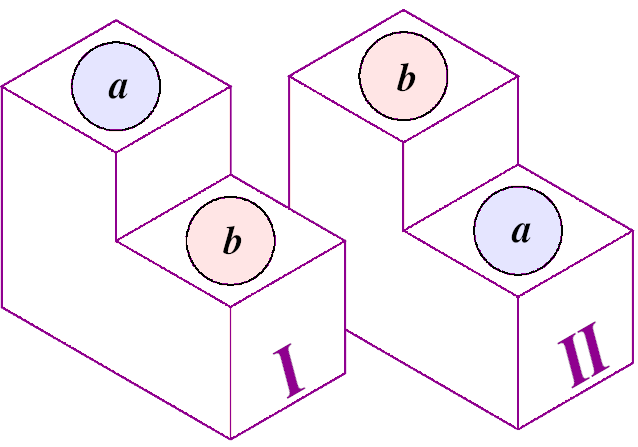

And here are the triplet permutations of a set with 3 elements:

In [5]:
k = list(itertools.permutations(['a','b','c']))
print(*k,sep="\n")
print("\nNumber of groups: ",len(k))
print("Number of triplets that can be constructed from 3 elements: "\
      ,special.perm(3,3))

('a', 'b', 'c')
('a', 'c', 'b')
('b', 'a', 'c')
('b', 'c', 'a')
('c', 'a', 'b')
('c', 'b', 'a')

Number of groups:  6
Number of triplets that can be constructed from 3 elements:  6.0


The number of $k$-populated sets permutations that can be made from a set of $n$ elements is given by the formula:

$$P_{n,k} = \frac{n!}{(n-k)!}$$

In [6]:
n = 3
k = 2
P_3_2 = special.factorial(n)/special.factorial(n-k)
print("P(3,2) = {:d}".format(int(P_3_2)))

P(3,2) = 6


## Combinations ('n choose k')
If the order is not important, for example we are dealing with a situation involving bosons (like photons) (or all the balls are colored in blue) the possible variations are constructed using combinations as (a,b) would be considered equivalent to (b,a), hence <u>the order is not important</u>. 

Following the permutation analogy above, we can visualize combination in two ways:
* placing two balls of same color onto the pedestal,
* dropping two differently colored balls into a bowl, so it doesn't matter which was put first. 

Continuing with our `abc` set, its pair and triplet combinations are as follows:

In [7]:
k = list(itertools.combinations(abc,r=2))
print(*k,sep="\n")
print("\nNumber of groups: ",len(k))
print("Number of pairs that can be constructed from 3 elements: "\
      ,special.comb(3,2))

('a', 'b')
('a', 'c')
('b', 'c')

Number of groups:  3
Number of pairs that can be constructed from 3 elements:  3.0


as can be verified, after including (a,b), (b,a) was considered equivalent, hence not listed.

In [8]:
k = list(itertools.combinations(abc,r=3))
print(*k,sep="\n")
print("\nNumber of groups: ",len(k))
print("Number of pairs that can be constructed from 3 elements: "\
      ,special.comb(3,3))

('a', 'b', 'c')

Number of groups:  1
Number of pairs that can be constructed from 3 elements:  1.0


The number of $k$-populated sets permutations that can be made from a set of $n$ elements is calculated by the formula:

$$C_{n,k} = \frac{P_{n,k}}{k!} = \frac{n!}{(n-k)!\,k!}$$

In [9]:
n = 3
k = 2
C_3_2 = special.factorial(n)/(special.factorial(n-k)
                              *special.factorial(k))
print("C(3,2) = {:d}".format(int(C_3_2)))

C(3,2) = 3


### Combinations with replacement (/repetition)
Combinations can also be visualized as pulling the items from a pouch/bag and placing them in a bowl so the order won't matter. There is a special case of picking the items: once we pull an item, we make a record of it and then put it back into the pouch for the next draw. This type of processes is conveniently termed as _combinations with replacement_.

So, if we have 'a','b','c' in our bag, (a,a) pair is as likely as (a,b) or (b,b) or any other possible combination:

In [10]:
k = list(itertools.combinations_with_replacement(abc,r=2))
print(*k,sep="\n")
print("\nNumber of groups: ",len(k))
print("Number of pairs that can be constructed from 3 elements: "\
      ,special.comb(3,2,repetition=True))

('a', 'a')
('a', 'b')
('a', 'c')
('b', 'b')
('b', 'c')
('c', 'c')

Number of groups:  6
Number of pairs that can be constructed from 3 elements:  6.0


The number of combinations with replacement is calculated using the following formula:

$$C_{n,k}^{REP} = \frac{(n+k-1)!}{(n-1)!\,k!}$$

In [11]:
n=3
k=2
special.factorial(n+k-1)/(special.factorial(k)
                          *special.factorial(n-1))

6.0

## Pascal's Triangle
Now consider Pascal's triangle which is pretty much straightforward to construct, where you start from two rows of 1's and then proceed to the next row by summing the two numbers above:

In [12]:
for n in range(10):
    print("{:20d}: ".format(n),end="")
    line = ""
    for k in range(n+1):
        c = special.binom(n,k)
        #c = special.comb(n,k)
        line = line+"{:5d}".format(int(c))
    print("{:^60s}".format(line))

                   0:                                1                            
                   1:                              1    1                         
                   2:                           1    2    1                       
                   3:                         1    3    3    1                    
                   4:                      1    4    6    4    1                  
                   5:                    1    5   10   10    5    1               
                   6:                 1    6   15   20   15    6    1             
                   7:               1    7   21   35   35   21    7    1          
                   8:            1    8   28   56   70   56   28    8    1        
                   9:          1    9   36   84  126  126   84   36    9    1     


_We can use either special.binom(n,k) or special.comb(n,k) to produce the coefficients (even though there is a slight difference between them, thus one is not an alias for the other, for our purposes this doesn't matter)._

As can also be seen from the code, the binom coefficient is the same as the combinations. For example, when we are wondering about the different configurations that yields 2 heads out of 3 coin tosses, we calculate $C_{3,2}$ and find that it's equal to 3 ("H,H,T","H,T,H","T,H,H") which is also there as the "2nd" term in the "3rd" row _(be careful that, like in Python, the iteration in the Pascal's Triangle also starts from 0: C(3,0) = 1; C(3,1) = 3; C(3,2) = 3; C(3,3) = 1 -- 'C(3,0)' means for example the number of configurations where we have 0 tails out of 3 tossings which is obviously one ('H','H','H'))._

### Example: Probability of getting 5 or more tails out of 8 coin tosses
We'll solve this question gradually. First, let's calculate the probability that a very specific sequence of 'T','T','T','T','T','H','H','H' (i.e., five tails are tossed consecutively, followed by 3 heads).

The probability of getting the tails side on our 1st toss is of course: 1/2.
On the second toss, it is once again: 1/2.
For the third, the fourth and the fifth, the same as: 1/2.

Now we need a heads side on the sixth. The probability that it will come on the sixth tossing is: 1/2 as well. And it is also the same for the seventh and the eighth. Therefore for this specific sequence to arrive, we have a probability of:

$$P("TTTTTHHH") = \underbrace{\frac{1}{2}\times\frac{1}{2}\times\dots\frac{1}{2}\times}_{\text{8 of them}} = \frac{1}{2^8} =\frac{1}{256}= 0.00390625$$

Actually, this probability is the same for any kind of sequence we'd like to get, whether it is an all tails ("TTTTTTTT") or a checkerlike pattern ("THTHTHTH"). 

How many configurations are there with 5 Tails and 3 Heads? We know that it is related to the combinations:

In [13]:
special.comb(8,5)

56.0

And what about the sequences themselves? I couldn't find a direct way to do it so here is a not so efficient (I guess) way for obtaining them:

* Generate a list of 8 that have five "T"s and three "H"s
* Construct all the possible permutations (as order is important and we have the same elements, there will be a huge amount of duplicates (40320 of them))
* Assign these lists as numpy array and use np.unique() to eliminate the duplicates. This way we get the different (i.e., where order is not important) configurations (56 of them).

In [14]:
k=list(itertools.permutations(["T","T","T","T","T","H","H","H"]))

In [15]:
print(len(k))

40320


We see that the number of sequences constructed this way is actually equal to the number of permutations (which is not one bit surprising):

In [16]:
print(special.perm(8,8))

40320.0


Due to the order being important and the elements being the same, the list will be dominated by duplicate sequences:

In [17]:
# Here is the first 6 of the constructed sequences:
print(*k[0:6],sep="\n")

('T', 'T', 'T', 'T', 'T', 'H', 'H', 'H')
('T', 'T', 'T', 'T', 'T', 'H', 'H', 'H')
('T', 'T', 'T', 'T', 'T', 'H', 'H', 'H')
('T', 'T', 'T', 'T', 'T', 'H', 'H', 'H')
('T', 'T', 'T', 'T', 'T', 'H', 'H', 'H')
('T', 'T', 'T', 'T', 'T', 'H', 'H', 'H')


so we filter out the duplicates via np.unique()

In [18]:
b = np.array(k)
b = np.unique(b,axis=0)
print(len(b))

56


We can go the additional mile by displaying all these 56 different sequences

In [19]:
for i,seq in enumerate(b, start = 1):
    print("{:>2d}.".format(i),\
          ("".join(map(str,seq))).replace("1","T").replace("0","H"),\
         end=" | " if (i%5) else "\n")

 1. HHHTTTTT |  2. HHTHTTTT |  3. HHTTHTTT |  4. HHTTTHTT |  5. HHTTTTHT
 6. HHTTTTTH |  7. HTHHTTTT |  8. HTHTHTTT |  9. HTHTTHTT | 10. HTHTTTHT
11. HTHTTTTH | 12. HTTHHTTT | 13. HTTHTHTT | 14. HTTHTTHT | 15. HTTHTTTH
16. HTTTHHTT | 17. HTTTHTHT | 18. HTTTHTTH | 19. HTTTTHHT | 20. HTTTTHTH
21. HTTTTTHH | 22. THHHTTTT | 23. THHTHTTT | 24. THHTTHTT | 25. THHTTTHT
26. THHTTTTH | 27. THTHHTTT | 28. THTHTHTT | 29. THTHTTHT | 30. THTHTTTH
31. THTTHHTT | 32. THTTHTHT | 33. THTTHTTH | 34. THTTTHHT | 35. THTTTHTH
36. THTTTTHH | 37. TTHHHTTT | 38. TTHHTHTT | 39. TTHHTTHT | 40. TTHHTTTH
41. TTHTHHTT | 42. TTHTHTHT | 43. TTHTHTTH | 44. TTHTTHHT | 45. TTHTTHTH
46. TTHTTTHH | 47. TTTHHHTT | 48. TTTHHTHT | 49. TTTHHTTH | 50. TTTHTHHT
51. TTTHTHTH | 52. TTTHTTHH | 53. TTTTHHHT | 54. TTTTHHTH | 55. TTTTHTHH
56. TTTTTHHH | 

Now that we have seen how to obtain the number of the sequences (as well as the sequences themselves), let's calculate the number of the sequences of length 8 with 5,6,7,8 tails in them:

In [20]:
n = 8
total = 0
for k in range(5,9):
    print("There are {:2d} different sequences with {:d} Tails in them."\
          .format(int(special.comb(n,k)),k))
    total += int(special.comb(n,k))

print("\nThat makes a total of {:d} sequences with 5 or more tails in them."\
      .format(total))

There are 56 different sequences with 5 Tails in them.
There are 28 different sequences with 6 Tails in them.
There are  8 different sequences with 7 Tails in them.
There are  1 different sequences with 8 Tails in them.

That makes a total of 93 sequences with 5 or more tails in them.


(check that 56, 28, 8 and 1 are the coefficients in Pascal's Triangle for $n=8$, $k={5,\dots,8}$)

So we have 93 acceptable cases and each of them has a probability of $\frac{1}{256}$, so that makes the overall probability of getting a sequence with 5 or more tails out of 8 coin tosses:

$$93\times\frac{1}{256} = \frac{93}{256} = 0.36328125$$

As a last remark: 256 is nothing but the **total number of possible outcomes** out of 8 coin tossings as each toss has 2 possible outcomes thus: 

$$\underbrace{2\times 2\times\dots\times 2}_{\text{8 tosses}}= 2^8 = 256$$.

This way of producing variations are discussed in the next section, "Products".

# Products
There is another yet different way of producing variations, but this one preserves each one in its lane and we get combinations that we can not achieve with the previous permutations and combinations (each one to its own way). So suppose that we have three slots and each slot has a different set of possibilities, like {a,b,c} for the first slot; {1,2} for the second and {!,#,?,\*} for the third slots. There are obviously $3x2x4=24$ possibile outcomes and we use products to get them.

Products work pretty much like distribution of multiplication over summation:

In [21]:
set1 = ('a','b','c')
set2 = (1,2)
set3 = ('!','#','?','*')

for i,word in enumerate(itertools.product(set1,set2,set3),start=1):
    print("{:>2d}. {:}".format(i,"".join(map(str,word)))\
          ,end=" | " if (i%5) else "\n")

 1. a1! |  2. a1# |  3. a1? |  4. a1* |  5. a2!
 6. a2# |  7. a2? |  8. a2* |  9. b1! | 10. b1#
11. b1? | 12. b1* | 13. b2! | 14. b2# | 15. b2?
16. b2* | 17. c1! | 18. c1# | 19. c1? | 20. c1*
21. c2! | 22. c2# | 23. c2? | 24. c2* | 

As an another application, we can use products to count in binary! 8) Since each slot will be composed of either 0 or 1, we can use the same set in all with the 'repeat' parameter:

In [22]:
set01 = (0,1)

for i,word in enumerate(itertools.product(set01,repeat = 4)):
    print("{:>2d}. {:}".format(i,"".join(map(str,word))))

 0. 0000
 1. 0001
 2. 0010
 3. 0011
 4. 0100
 5. 0101
 6. 0110
 7. 0111
 8. 1000
 9. 1001
10. 1010
11. 1011
12. 1100
13. 1101
14. 1110
15. 1111


# Example: Probability of getting 5 or more tails out of 8 coin tosses (Monte Carlo)

Let's calculate the probability of getting 5+ tails out of 8 tosses using Monte Carlo method. 

First, define a function that returns the number of tails from a randomly tossed sequence of 8 tosses:

In [23]:
def num_tails_in_n_toss(n=8):
    set_HT = ["head","tail"]
    toss8 = random.choices(set_HT,k=n)
    #print(toss8)
    #print("Number of tails: {:}".format(toss8.count('tail')))
    return toss8.count('tail')

In [24]:
num_tails_in_n_toss()

3

Now iterate over this function N times and keep the score of tossings with 5+ tails:

In [25]:
N = 100000
count_5_or_more = 0
for i in range(N):
    if(num_tails_in_n_toss() > 4):
        count_5_or_more += 1

print("{:d} of {:d} tosses have 5+ tails.".format(count_5_or_more,N))
print("Total probability (MC): {:.3f}".format(count_5_or_more/N))
print("Analtyical solution: {:.3f}".format(93/256))

36317 of 100000 tosses have 5+ tails.
Total probability (MC): 0.363
Analtyical solution: 0.363


**References:**
* [Miguel A. Lerma - Mathematical Foundations of Computer Science Lecture Notes](https://sites.math.northwestern.edu/~mlerma/courses/cs310-05s/)(["More Combinatorics"](https://sites.math.northwestern.edu/~mlerma/courses/cs310-05s/notes/dm-gcomb))
* [Ken A. Dill & Sarina Bromberg - Molecular Driving Forces](https://www.amazon.com/Molecular-Driving-Forces-Statistical-Thermodynamics/dp/0815344309) (Chp 1: "Principles of Probability")